## Analysis of data taken from Nao standing to establish errors, offset and drift:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import optimize
from scipy.optimize import curve_fit

## Errors and offset of Acceleration (Z):
### 24000 data points at frequency 100HZ

[-1.75477688e-04 -6.42676721e+01]
Root mean square error is 0.08561026965499492


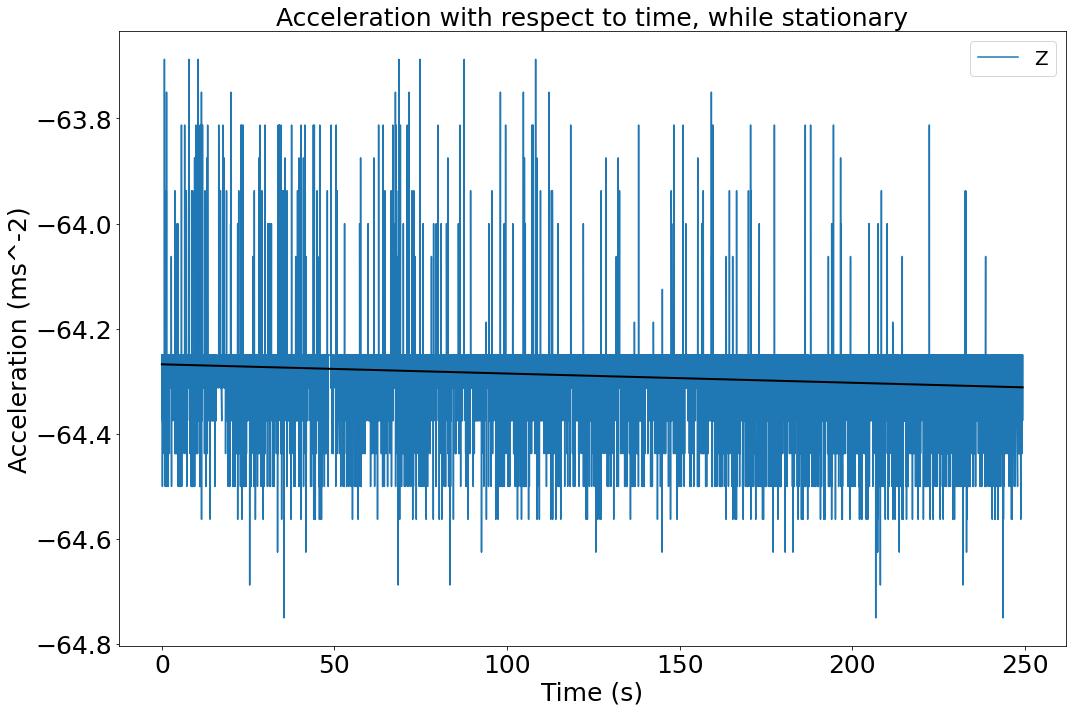

In [2]:
'''FINDING LINEAR FORM OF ACCELERATION'''

def line(x, m, c):
    return m*x + c

Adata = pd.read_csv (r'C:\Users\Ellie\Desktop\third year\Group studies\acc 4 Z.csv')
dA = pd.DataFrame(Adata, columns = ['Z', 'Time'])
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
dA.set_index('Time').plot()
plt.ylabel('Z Acceleration ms^-2')
plt.title('Acceleration measurement over time, while stationary')

Ta = np.array(Adata.Time)
A = np.array(Adata.Z)
n = len(A)  #length of data set

parsA, covA = curve_fit(line, Ta, A, p0=[1,1]) #curve optimisation to find best fit parameters
print(parsA)
Abfl = line(Ta, *parsA) #best fit line
#print(Abfl)
res = A - Abfl          #residuals
se = np.sum(res**2)     #sum of squared residuals
mse = se/n              #mean square error
  
rmse = np.sqrt(mse)     #root mean square error
print('Root mean square error is', rmse)

#print(res)
#print(parsA)

plt.plot(Ta, line(Ta, *parsA), linewidth=2, color='black')
# plt.figure(figsize=(20,10))
plt.xlabel('Time (s)', fontsize = 25)
plt.ylabel('Acceleration (ms^-2)', fontsize=25)
plt.title('Acceleration with respect to time, while stationary', fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(fontsize=20)
plt.show()
#plt.xlim(0, 30)

## Error and offset of Gyroscope:
### 24000 data points at frequency 200Hz

[0.05626799 0.05626776 0.05626683 ... 0.04308835 0.04308777 0.04308777]
Root mean square error is 0.49310951976113987
[-0.00011615  0.05626881]


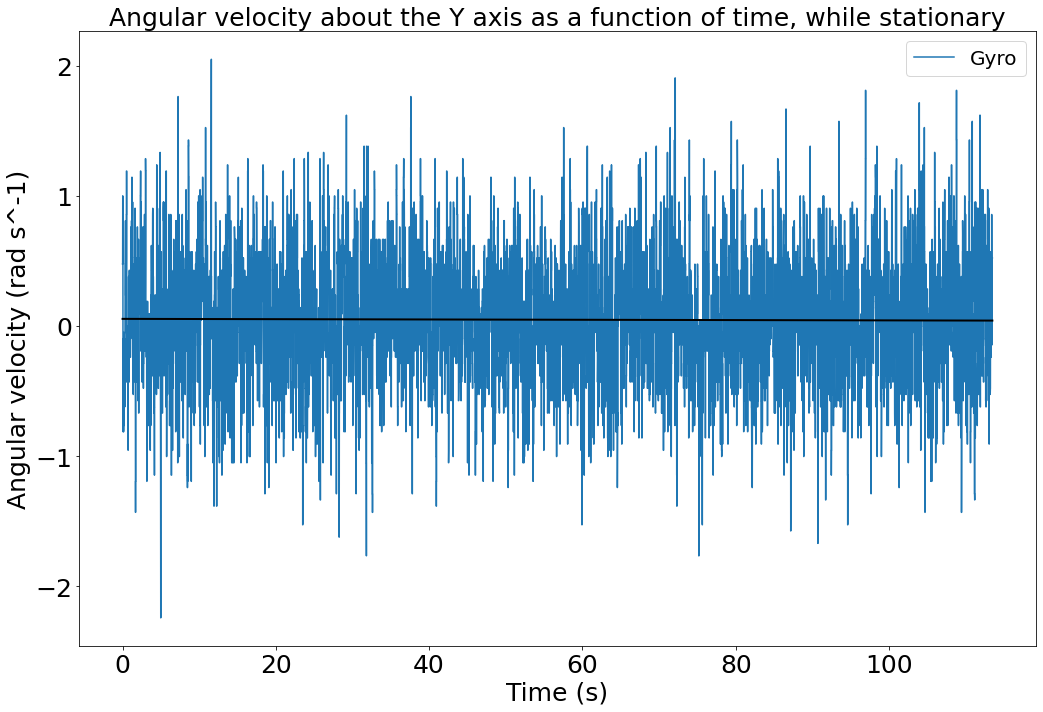

In [3]:
Gsdata3 = pd.read_csv (r'C:\Users\Ellie\Desktop\third year\Group studies\gyro 4.csv')
dGs3 = pd.DataFrame(Gsdata3, columns = ['Gyro', 'Time'])
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
dGs3.set_index('Time').plot()
plt.ylabel('Angular velocity, ms^-1')

T3 = np.array(Gsdata3.Time)
G3 = np.array(Gsdata3.Gyro)
n3 = len(G3)


''' Calculation of RMS Error: '''

parsG3, covG3 = curve_fit(line, T3, G3, p0=[1,1])
stdevs3 = np.sqrt(np.diag(covG3))
bfl3 = line(T3, *parsG3)
print(bfl3)
res3 = G3 - bfl3
se3 = np.sum(res3**2)
mse3 = se3/n3 
rmse3 = np.sqrt(mse3)
print('Root mean square error is', rmse3)

print(parsG3)

plt.plot(T3, line(T3, *parsG3), linewidth=2, color='black')
plt.xlabel('Time (s)', fontsize = 25)
plt.ylabel('Angular velocity (rad s^-1)', fontsize=25)
plt.title('Angular velocity about the Y axis as a function of time, while stationary', fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(fontsize=20)
plt.show()